In [430]:
import numpy as np
import matplotlib.pyplot as plt

from alpub_autoencoder.autoencoder_utils import read_alpub_data
from alpub_autoencoder.image_prcoessor_utils import smoothen_image
from alpub_autoencoder.image_prcoessor_utils import apply_adaptive_thresholding
from alpub_autoencoder.image_prcoessor_utils import apply_erosion_dialiation
from alpub_autoencoder.image_prcoessor_utils import remove_disconnected_regions
from alpub_autoencoder.image_prcoessor_utils import apply_otsu_thresholding

from PIL import Image

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ALPUB_PATH = '../../Datasets/alpub_v2/images'

In [3]:
X,Y = read_alpub_data(path=ALPUB_PATH)

Processing Alpha
Processing Beta
Processing Chi
Processing Delta
Processing Epsilon
Processing Eta
Processing Gamma
Processing Iota
Processing Kappa
Processing Lambda
Processing LunateSigma
Processing Mu
Processing Nu
Processing Omega
Processing Omicron
Processing Phi
Processing Pi
Processing Psi
Processing Rho
Processing Tau
Processing Theta
Processing Upsilon
Processing Xi
Processing Zeta


In [4]:
Y.shape

(205797, 24)

In [5]:
X.shape

(205797, 70, 70, 3)

In [6]:
# Convert the RGB images to grayscale
X_gray = []
for img in X:
    image_gray = Image.fromarray(img).convert("L")
    X_gray.append(np.array(image_gray))

In [414]:
# Load the greyscaled image

image_no = 126098
image = X_gray[image_no]

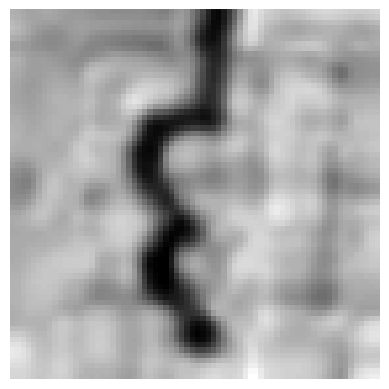

In [419]:
# Display the grayscale image
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [416]:
import cv2

In [418]:
# Apply smoothing
image_smooth = smoothen_image(image, kernel_size=3)

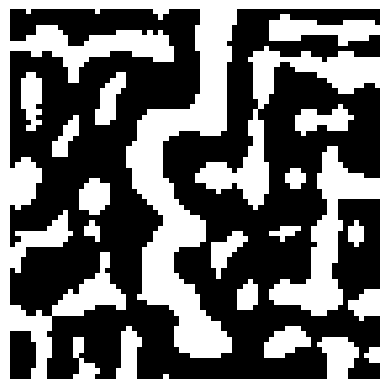

In [423]:
# Apply adaptive thresholding
adapt_thresholded_image = apply_adaptive_thresholding(image)

# Display the thresholded image
plt.imshow(adapt_thresholded_image, cmap="gray")
plt.axis("off")
plt.show()

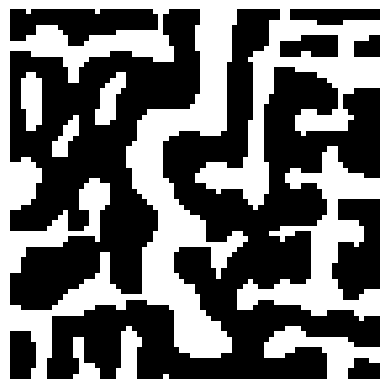

In [427]:
# Apply erosion and dilation
seg_image = apply_erosion_dialiation(adapt_thresholded_image, kernel_size=3, no_iterations=1)

# Display the segmented image
plt.imshow(seg_image, cmap="gray")
plt.axis("off")
plt.show()

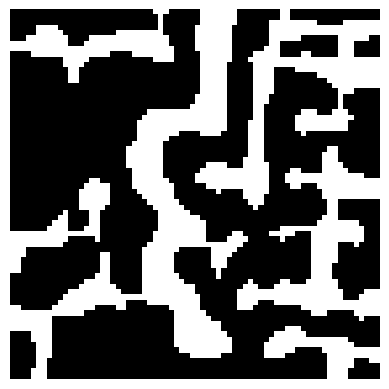

In [429]:
#Remove disconnected regions
filtered_image = remove_disconnected_regions(seg_image,min_region_size=50)

# Display the filtered image
plt.imshow(filtered_image, cmap="gray")
plt.axis("off")
plt.show()

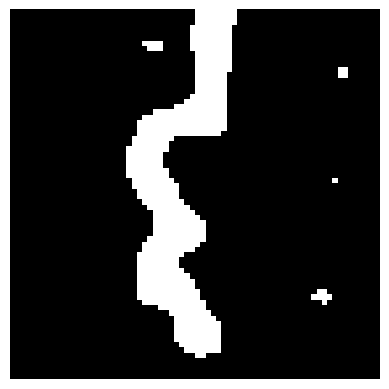

In [433]:
#Apply Otsu's thresholding
otsu_thresholded_image = apply_otsu_thresholding(image)

# Display the thresholded image
plt.imshow(otsu_thresholded_image, cmap="gray")
plt.axis("off")
plt.show()

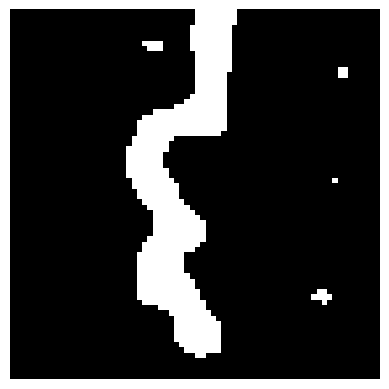

In [434]:
# Perform erosion and dialation
seg_image = apply_erosion_dialiation(otsu_thresholded_image, kernel_size=3, no_iterations=1)

# Display the segmented image
plt.imshow(seg_image, cmap="gray")
plt.axis("off")
plt.show()

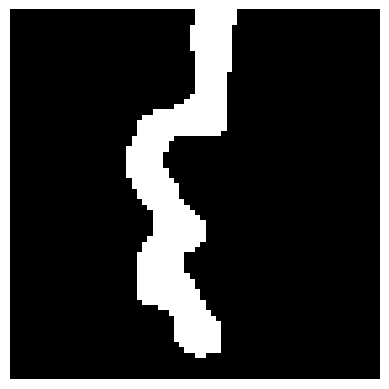

In [435]:
#Remove disconnected regions
filtered_image = remove_disconnected_regions(seg_image,min_region_size=50)

# Display the filtered image
plt.imshow(filtered_image, cmap="gray")
plt.axis("off")
plt.show()

Pretrained DeepLabV3 model does not work for character segmentation because it is trained mainly on human and animal images to separate foreground from the background.

In [388]:
# Trying some pretrained segmentation models

import torch
from torchvision import models
from torchvision.transforms import functional as F
from PIL import Image

In [325]:
model = models.segmentation.deeplabv3_resnet101(pretrained=True)
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [366]:
# Load the greyscaled image

image_no = 12
image = X[image_no]

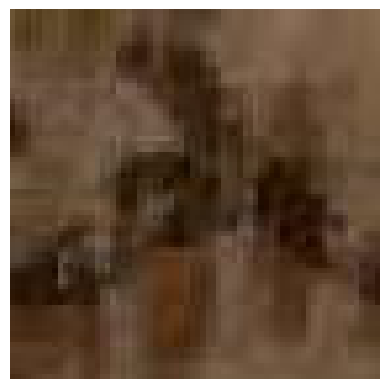

In [367]:
# Display image
plt.imshow(image)
plt.axis("off")
plt.show()

In [368]:
image = cv2.resize(image, (513, 513))

In [369]:
image.shape

(513, 513, 3)

In [370]:
image = F.to_tensor(image).unsqueeze(0)

In [371]:
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/deeplab1.png", "deeplab1.png")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [372]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
input_image = input_image.convert("RGB")
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

In [373]:
with torch.no_grad():
    output = model(image)['out']

In [374]:
_, predicted = torch.max(output, 1)
predicted = predicted.squeeze(0).cpu().numpy()

In [375]:
mask = Image.fromarray(predicted.astype('uint8'))

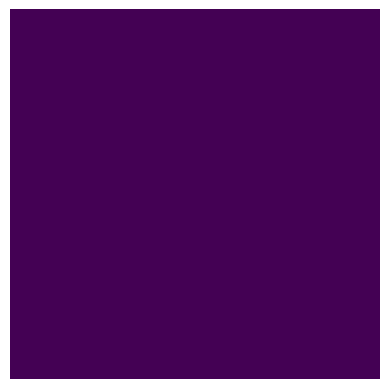

In [376]:
# Display image
plt.imshow(mask)
plt.axis("off")
plt.show()

In [ ]:
#Process and save and segmented masks for ALPUB dataset